In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# make consistent df loading

In [2]:
an_df, sc_df = pd.read_csv("../raw_data/DataAnalyst.csv"), pd.read_csv("../raw_data/DataScientist.csv")

In [3]:
g_df = pd.concat([an_df, sc_df])

In [4]:
g_df = g_df.drop(columns = 'Unnamed: 0')

In [5]:
g_df.columns = [column.replace(' ', '_').lower() for column in g_df.columns]

In [24]:
g_df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'easy_apply', 'index'],
      dtype='object')

# How to manage titles?

In [28]:
len(g_df.job_title.unique())

3014

In [29]:
len(g_df.job_title)

6162

In [47]:
job_title_list = g_df.job_title.unique()

In [63]:
jb_title = pd.DataFrame({'title':job_title_list})

In [64]:
jb_title

,title
0,"Data Analyst, Center on Immigration and Justic..."
1,Quality Data Analyst
2,"Senior Data Analyst, Insights & Analytics Team..."
3,Data Analyst
4,Reporting Data Analyst
...,...
3009,Senior Data Engineer (Data ELT/ETL Engineer)
3010,Columbus Data Science Tutor Jobs
3011,Cyber Security Data Engineer
3012,Security Analytics Data Engineer


In [95]:
counts = pd.DataFrame(g_df.job_title.value_counts())
counts.rename(columns = {'job_title':'counts'}, inplace = True)

In [86]:
counts

,counts
Data Analyst,651
Data Scientist,274
Data Engineer,260
Senior Data Analyst,137
Senior Data Scientist,91
...,...
"Data Analyst 3, Customer Experience - Centennial",1
Senior Health Data Analyst (SAS),1
ColdFusion Development Data Analyst -Remote,1
RQS - IHHA - 201900004460 -1s Data Security Analyst,1


In [96]:
counts['titles'] = counts.index

In [97]:
counts.reset_index(inplace = True)
counts.drop(columns = 'index', inplace = True)

In [108]:
counts.keys

<bound method NDFrame.keys of       counts                                             titles
0        651                                       Data Analyst
1        274                                     Data Scientist
2        260                                      Data Engineer
3        137                                Senior Data Analyst
4         91                              Senior Data Scientist
...      ...                                                ...
3009       1   Data Analyst 3, Customer Experience - Centennial
3010       1                   Senior Health Data Analyst (SAS)
3011       1        ColdFusion Development Data Analyst -Remote
3012       1  RQS - IHHA - 201900004460 -1s Data Security An...
3013       1  Patient Safety Physician or Safety Scientist -...

[3014 rows x 2 columns]>

In [114]:
len(counts[counts['counts'] == 1])

2311

In [115]:
len(counts[counts['counts'] > 10])

34

In [120]:
sum(counts[counts['counts'] > 3].counts)

2652

<BarContainer object of 3014 artists>

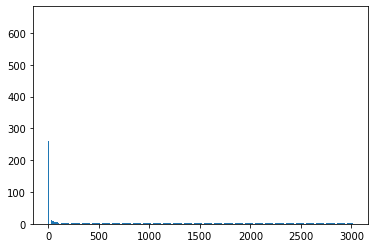

In [110]:
plt.bar(height = counts['counts'], x = counts.index)

In [ ]:
plt.hist(counts.counts)

# Salaries

In [252]:
salary = g_df['salary_estimate']

In [253]:
salary

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
3904    $55K-$112K (Glassdoor est.)
3905    $55K-$112K (Glassdoor est.)
3906    $55K-$112K (Glassdoor est.)
3907    $55K-$112K (Glassdoor est.)
3908    $55K-$112K (Glassdoor est.)
Name: salary_estimate, Length: 6162, dtype: object

In [254]:
salary = salary.apply(lambda x: x.replace('K', ''))\
            .apply(lambda x: x.replace('$', ''))\
            .apply(lambda x: x.replace('(Glassdoor est.)', ''))

salary = salary.str.split("-", expand = True)

salary = salary.apply(lambda x: x.replace('', '0'))
salary[1] = salary[1].apply(lambda x: x.replace('(Employer est.)', ''))\
                     .apply(lambda x: x.replace(' Per Hour', '-*'))

salary[[1,'flag']] = salary[1].str.split("-", expand = True)

salary[[0,1]] = salary[[0,1]].astype(int)

salary.loc[salary.flag == '*', [0,1]] = salary.loc[salary.flag == '*', [0,1]]*40*52/1000
salary['mean'] = (salary[0] + salary[1]) / 2

In [ ]:
#salary.drop(columns = 'flag', inplace = True)

In [251]:
salary[salary['flag'] == '*']

,0,1,flag
685,70.72,110.24,*
686,70.72,110.24,*
687,70.72,110.24,*
688,70.72,110.24,*
689,70.72,110.24,*
690,70.72,110.24,*
691,70.72,110.24,*
1295,20.80,54.08,*
1296,20.80,54.08,*
1297,20.80,54.08,*


In [231]:
salary.loc[salary.flag == '*', [0,1]]

,0,1
685,70.72,110.24
686,70.72,110.24
687,70.72,110.24
688,70.72,110.24
689,70.72,110.24
690,70.72,110.24
691,70.72,110.24
1295,20.80,54.08
1296,20.80,54.08
1297,20.80,54.08


In [236]:
# # f = lambda x: int(round(x))
# salary.loc[salary.flag == '*',0] = salary.loc[salary.flag == '*',0].apply(lambda x: round(x))
# salary.loc[salary.flag == '*',1] = salary.loc[salary.flag == '*',1].apply(lambda x: round(x))
# salary.loc[salary.flag == '*']

,0,1,flag
685,71.0,110.0,*
686,71.0,110.0,*
687,71.0,110.0,*
688,71.0,110.0,*
689,71.0,110.0,*
690,71.0,110.0,*
691,71.0,110.0,*
1295,21.0,54.0,*
1296,21.0,54.0,*
1297,21.0,54.0,*


In [256]:
salary

,0,1,flag,mean
0,37.0,66.0,None,51.5
1,37.0,66.0,None,51.5
2,37.0,66.0,None,51.5
3,37.0,66.0,None,51.5
4,37.0,66.0,None,51.5
...,...,...,...,...
3904,55.0,112.0,None,83.5
3905,55.0,112.0,None,83.5
3906,55.0,112.0,None,83.5
3907,55.0,112.0,None,83.5


In [113]:
#used when testing for problem values
# i = 0
# for value in salary.values:
#     try:
#         value.astype('int')
#     except:
#         print(value)
#         i +=1
        
# print(i)

['34' '53 Per Hour']
['34' '53 Per Hour']
['34' '53 Per Hour']
['34' '53 Per Hour']
['34' '53 Per Hour']
['34' '53 Per Hour']
['34' '53 Per Hour']
['10' '26 Per Hour']
['10' '26 Per Hour']
['10' '26 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
21


In [ ]:
salary = salary.astype('int')

In [103]:
salary = salary.apply(lambda x: x * 1000)

In [108]:
salary[salary[0] == 0]

,0,1
2149,0,1000


In [90]:
# salary.applymap(lambda x: int(x))
# astype()


In [102]:
salary.dtypes

0    int64
1    int64
dtype: object

## following up on the per hours

In [116]:
for est in g_df["salary_estimate"]:
    if 'Per Hour' in est:
        print(est)

$34-$53 Per Hour(Glassdoor est.)
$34-$53 Per Hour(Glassdoor est.)
$34-$53 Per Hour(Glassdoor est.)
$34-$53 Per Hour(Glassdoor est.)
$34-$53 Per Hour(Glassdoor est.)
$34-$53 Per Hour(Glassdoor est.)
$34-$53 Per Hour(Glassdoor est.)
$10-$26 Per Hour(Glassdoor est.)
$10-$26 Per Hour(Glassdoor est.)
$10-$26 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)


In [134]:
temp_df = g_df[g_df["salary_estimate"].str.contains('Per Hour')]

In [135]:
temp_df

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,index
685,"Clinical Laboratory Scientist, Per Diem",$34-$53 Per Hour(Glassdoor est.),"As the Clinical Laboratory Scientist, you will...",3.8,UC Davis Medical Center\n3.8,"Los Angeles, CA","Sacramento, CA",10000+ employees,-1,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,793.0
686,Sr. Data Analyst,$34-$53 Per Hour(Glassdoor est.),"As a Sr. Data Analyst, you will work closely w...",2.8,SAG-AFTRA Health Plan and SAG-Producers Pensio...,"Burbank, CA","Burbank, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1,794.0
687,"Lead Data Science Instructor, Data Scientist",$34-$53 Per Hour(Glassdoor est.),Job Description\nGalvanize is a dynamic learni...,-1.0,Galvanize Inc.,"Los Angeles, CA","Harrisburg, NC",51 to 200 employees,-1,Company - Private,Construction,"Construction, Repair & Maintenance",Unknown / Non-Applicable,-1,-1,795.0
688,"Clinical Laboratory Scientist (Per Diem, Varia...",$34-$53 Per Hour(Glassdoor est.),"Monterey Park Hospital, located in the San Gab...",3.0,AHMC Healthcare\n3.0,"Monterey Park, CA","Alhambra, CA",5001 to 10000 employees,1998,Company - Private,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1,796.0
689,Data Engineer,$34-$53 Per Hour(Glassdoor est.),Responsibilities:* Responsible for building an...,-1.0,BlackLine Systems,"Woodland Hills, CA","Markham, Canada",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,-1,797.0
690,Clinical Laboratory Scientist - Generalist,$34-$53 Per Hour(Glassdoor est.),LGC Labs is the trusted partner in laboratory ...,3.8,LetsGetChecked\n3.8,"Monrovia, CA","New York, NY",51 to 200 employees,2015,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,-1,798.0
691,"Clinical Laboratory Scientist , Med Tech",$34-$53 Per Hour(Glassdoor est.),Job Overview:\n\n\nCovance is looking for a Cl...,3.4,Covance\n3.4,"Los Angeles, CA","Burlington, NC",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $25 million (USD),"PRA Health Sciences, PPD, IQVIA",-1,799.0
1295,Stafford Data Science Tutor Jobs,$10-$26 Per Hour(Glassdoor est.),#Stafford Data Science Tutor Jobs\n\nVarsity T...,4.2,Varsity Tutors\n4.2,"Stafford, TX","Saint Louis, MO",201 to 500 employees,2007,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,-1,1440.0
1296,Spring Data Science Tutor Jobs,$10-$26 Per Hour(Glassdoor est.),#Spring Data Science Tutor Jobs\n\nVarsity Tut...,4.2,Varsity Tutors\n4.2,"Spring, TX","Saint Louis, MO",201 to 500 employees,2007,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,-1,1441.0
1297,Sugar Land Data Science Tutor Jobs,$10-$26 Per Hour(Glassdoor est.),#Sugar Land Data Science Tutor Jobs\n\nVarsity...,4.2,Varsity Tutors\n4.2,"Sugar Land, TX","Saint Louis, MO",201 to 500 employees,2007,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,-1,1442.0


In [138]:
len(temp_df.company_name.unique())

19

In [141]:
 per_hour_jd = [jd for jd in temp_df.job_description]

In [164]:
print(per_hour_jd[21])

IndexError: list index out of range